# QUESTION 1

***part 1***

First, the PYCBC programme is installed.

In [1]:
import sys
!{sys.executable} -m pip install lalsuite pycbc

     |████████████████████████████████| 27.3MB 147kB/s 
     |████████████████████████████████| 3.2MB 50.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 1.6MB 36.9MB/s 
     |████████████████████████████████| 890kB 45.6MB/s 
     |████████████████████████████████| 481kB 42.9MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 3.2MB 42.2MB/s 
  Created wheel for pycbc: filename=PyCBC-1.17.0-cp36-cp36m-linux_x86_64.whl size=5711429 sha256=94969154d71fbed38800568a8b0f2856eacaa03d5ecb0da779f768d728617133
  Stored in directory: /root/.cache/pip/wheels/51/1c/69/7de581c512e9465dad0d6a955c4a947425799fe14f6226d3a8
Successfully built pycbc
  Created wheel for ligo-segments: filename=ligo_segments-1.3.0-cp36-cp36m-linux_x86_64.whl size=84677 sha256=78e393aa79f6fd674823b3dd4e

Bunch of imports were made to get the appropriate tools for analysing the data.

In [2]:
from __future__ import division

import numpy
import lal
import lalsimulation

import matplotlib.pyplot as plt
from scipy import interpolate
from numpy import pi
from scipy import constants
from pycbc.conversions import *
from astropy import cosmology
from pycbc import waveform


Waveform approximants, that model waveforms, are imported.

In [3]:
from pycbc.waveform import td_approximants, fd_approximants # with pycbc.waveform can create model waveforms

# List of td approximants thsqat are currently available
print(td_approximants()) # prints all the possible model waveforms

['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'EOBNRv2_RO

The data used were fetched online. All the events downloaded from these websites. Later on, we will look at only one of the events.

In [4]:
!wget -nc https://dcc.ligo.org/public/0146/P1700349/001/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf
!wget -nc https://dcc.ligo.org/public/0146/P1700349/001/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf


--2021-02-22 19:06:36--  https://dcc.ligo.org/public/0146/P1700349/001/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57824232 (55M)
Saving to: ‘H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf’

H-H1_LOSC_CLN_4_V1- 100%[===================>]  55.14M  33.9MB/s    in 1.6s    

2021-02-22 19:06:38 (33.9 MB/s) - ‘H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf’ saved [57824232/57824232]

--2021-02-22 19:06:38--  https://dcc.ligo.org/public/0146/P1700349/001/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62070438 (59M)
Saving to: ‘L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf’

L-L1_LOSC_CLN_4_V1- 100%[===================>]  59.19M  34.5MB/s    in 1.7s    

20

Pick the event with the code *GW170817*. We pick the time frame from 224 seconds before merging and end 32 seconds after merging.

In [5]:
%matplotlib inline
import pylab
from pycbc.filter import highpass
from pycbc.catalog import Merger
from pycbc.frame import read_frame

merger = Merger("GW170817") # the merging part of the event, event = two black holes merging and causing gravitational wave 
strain, stilde = {}, {}
for ifo in ['L1', 'H1']:
    ts = read_frame("{}-{}_LOSC_CLN_4_V1-1187007040-2048.gwf".format(ifo[0], ifo),
                    '{}:LOSC-STRAIN'.format(ifo),
                    start_time=merger.time - 224, # merger.time = the time of merging
                    end_time=merger.time + 32,
                    check_integrity=False)

Cleaning and applying highpass filter. Downsample to 2048 Hz to make the data analysis more convenient. Power density of the noise is higher than the signal. At higher frequency the amplitude of the noise is lower. And then graph.

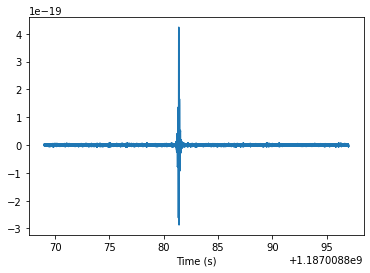

In [6]:
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass

from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass

merger = Merger("GW170817")
strain, stilde = {}, {} # tuple of directories: strain and stilde=cleaned data
for ifo in ['L1', 'H1']:
    # We'll download the data and select 256 seconds that includes the event time
    ts = merger.strain(ifo)
    # Remove the low frequency content and downsample the data to 2048Hz
    strain[ifo] = resample_to_delta_t(highpass(ts, 15.0), 1.0/2048)
    #remove the begining and ending spikes from the data
    strain[ifo] = strain[ifo].crop(2, 2) # remove 2 first and 2 last seconds
    # Also create a frequency domain version of the data
    stilde[ifo] = strain[ifo].to_frequencyseries()

#print (strain.delta_t)
pylab.plot(strain['L1'].sample_times, strain['L1'])
pylab.xlabel('Time (s)')
pylab.show()

***part 2***

Then the power spectral density is plotted.

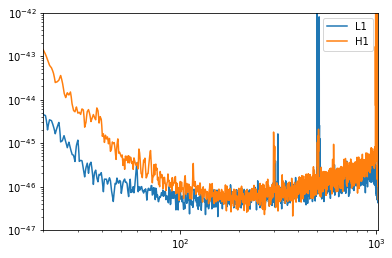

In [7]:
import pycbc.psd
from pycbc.psd import interpolate

psds = {}
for ifo in ['L1', 'H1']:


    delta_t = strain[ifo].delta_t
    seg_len = int(2 / delta_t)
    seg_stride = int(seg_len / 2)
    psds[ifo]  = pycbc.psd.welch(strain[ifo],
                      seg_len=seg_len,
                      seg_stride=seg_stride)
    
    psds[ifo] = interpolate(psds[ifo], stilde[ifo].delta_f)

    pylab.loglog(psds[ifo].sample_frequencies, psds[ifo], label=ifo)
    pylab.xlim(20, 1024)
    pylab.ylim(1e-47, 1e-42)
pylab.legend()

Signal to noise ratio calculation. Finding SNRS = max. 

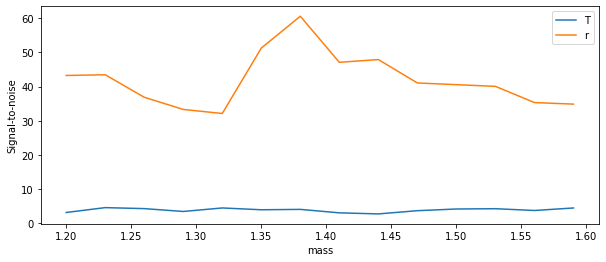

In [8]:
from pycbc.waveform import get_td_waveform
from pycbc.filter import matched_filter
from pycbc.conversions import mass1_from_mchirp_q
import numpy

# We will try different component masses and see which gives us the largest 
#chirp_mass = numpy.arange(35, 37\, .1)
#masses = mass1_from_mchirp_q(chirp_mass, 1)
mass1 = numpy.arange(1.2, 1.6, 0.03) #mass range between 1.2 and 1.6 to get shorter run-time
mass2 = mass1

# Variables to store when we've found the max
hmax, smax, tmax, mmax, nsnr = None, {}, {}, 0, 0
snrs = {}
ifo = 'H1'
Snr_list = []
for i in range(len(mass1)):
    #Generate a waveform with a given component mass; assumed equal mass, nonspinning
 
    m = mass1[i] # Solar masses
    hp, hc = get_td_waveform(approximant="TaylorT4",
                     mass1=m,
                     mass2=m,
                     delta_t=strain[ifo].delta_t,
                     f_lower=25.0)

    # We will resize the vector to match our data
    hp.resize(len(strain[ifo]))
    template = hp.cyclic_time_shift(hp.start_time)
    
    snr = matched_filter(template, strain[ifo],
                     psd=psds[ifo], low_frequency_cutoff=15.0)

    # Remove time corrupted by the template filter and the psd filter
    # We remove 4 seonds at the beginning and end for the PSD filtering
    # And we remove 4 additional seconds at the beginning to account for
    # the template length (this is somewhat generous for 
    # so short a template). A longer signal such as from a BNS, would 
    # require much more padding at the beginning of the vector.
    snr_H1 = snr.crop(4 + 4, 4)


    Snr_list.append(max(abs(snr_H1)))
snrs[ifo] = Snr_list



ifo = 'L1'
Snr_list = []
for i in range(len(mass1)):
    #Generate a waveform with a given component mass; assumed equal mass, nonspinning
 
    m = mass1[i] # Solar masses
    hp, hc = get_td_waveform(approximant="TaylorT4",
                     mass1=m,
                     mass2=m,
                     delta_t=strain[ifo].delta_t,
                     f_lower=25.0)

    # We will resize the vector to match our data
    hp.resize(len(strain[ifo]))
    template = hp.cyclic_time_shift(hp.start_time)
    
    snr = matched_filter(template, strain[ifo],
                     psd=psds[ifo], low_frequency_cutoff=25.0)

    # Remove time corrupted by the template filter and the psd filter
    # We remove 4 seonds at the beginning and end for the PSD filtering
    # And we remove 4 additional seconds at the beginning to account for
    # the template length (this is somewhat generous for 
    # so short a template). A longer signal such as from a BNS, would 
    # require much more padding at the beginning of the vector.
    snr_H1 = snr.crop(4 + 4, 4)


    Snr_list.append(max(abs(snr_H1)))
snrs[ifo] = Snr_list

# Why am I taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be 
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(mass1, snrs['H1'], label= 'H1')
pylab.plot(mass1, snrs['L1'], label= 'L1')
pylab.legend('True')
pylab.ylabel('Signal-to-noise')
pylab.xlabel('mass')
pylab.show()

Compare waveforms to each other. 

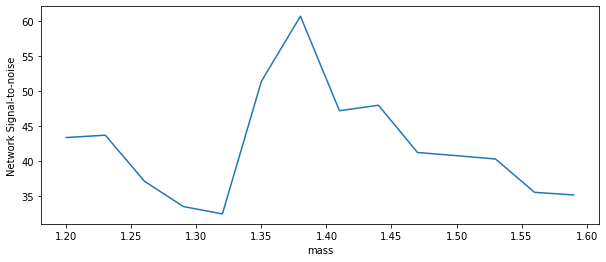

We found the best Mass1=Mass2 was 1.38 solar masses (detector frame)


In [9]:
nsnr = (numpy.array(snrs['H1'])**2 + numpy.array(snrs['L1'])**2)**0.5
ii = numpy.where(nsnr == max(nsnr))
pylab.figure(figsize=[10, 4])
pylab.plot(mass1, nsnr)

pylab.ylabel('Network Signal-to-noise')
pylab.xlabel('mass')
pylab.show()

print("We found the best Mass1=Mass2 was %2.2f solar masses (detector frame)" % mass1[ii])

Finding the optimal mass is 1.38. Then, calculating SNR time series.

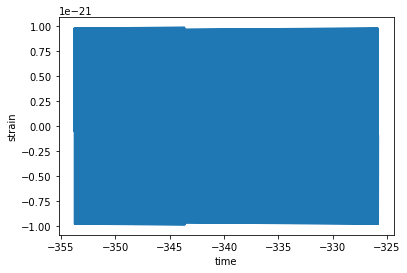

In [10]:
# In this case we "know" what the signal parameters are. In a search
# we would grid over the parameters and calculate the SNR time series
# for each one

# We'll assume equal masses, which is within the posterior probability
# of GW170817. 
m = 1.38 # Solar masses
conditioned = strain['H1']
hp, hc = get_td_waveform(approximant="TaylorT2",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=15.0)

# We will resize the vector to match our data
hp.resize(len(conditioned))

# The waveform begins at the start of the vector, so if we want the
# SNR time series to correspond to the approximate merger location
# we need to shift the data so that the merger is approximately at the 
# first bin of the data.

# This function rotates the vector by a fixed amount of time.
# It treats the data as if it were on a ring. Note that
# time stamps are *not* in general affected, but the true
# position in the vector is.
#
# By convention waveforms returned from `get_td_waveform` have their
# merger stamped with time zero, so we can use the start time to 
# shift the merger into position
template = hp .cyclic_time_shift(hp.start_time)
pylab.plot(hp.sample_times, template)
pylab.xlabel('time')
pylab.ylabel('strain')
pylab.show()

Calculating the matched filter.

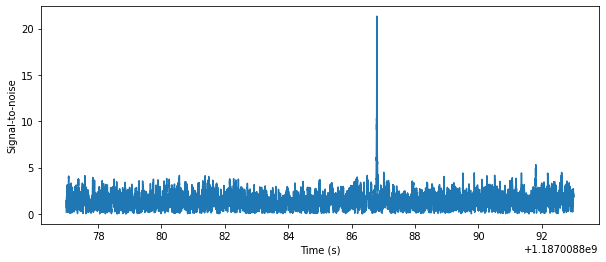

We found a signal at 1187008886.7944336s with SNR 21.332746139572084


In [11]:
from pycbc.filter import matched_filter
import numpy

ifo = 'L1'                            
conditioned = strain[ifo]
snr = matched_filter(template, conditioned, # template is what we are trying to find from all the processing above (from the detector)
                     psd=psds[ifo] , low_frequency_cutoff=20)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for 
# so short a template). A longer signal such as from a BNS, would 
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)

# Why am I taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be 
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))


In [12]:
from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dt = time - conditioned.start_time
aligned = template.cyclic_time_shift(dt) 

# scale the template so that it would have SNR 1 in this data
aligned /= sigma(aligned, psd=psds[ifo], low_frequency_cutoff=20.0)

# Scale the template amplitude and phase to the peak value
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = conditioned.start_time

Whitening the data to simplify the analysis.

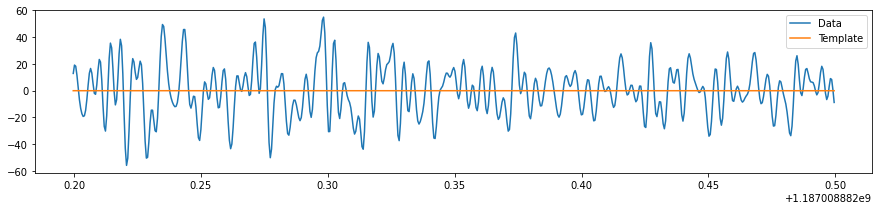

In [13]:

# We do it this way so that we can whiten both the template and the data
white_data = (conditioned.to_frequencyseries() / psds[ifo]**0.5).to_timeseries()

# apply a smoothing of the turnon of the template to avoid a transient
# from the sharp turn on in the waveform.
tapered = aligned.highpass_fir(30, 512, remove_corrupted=False)
white_template = (tapered.to_frequencyseries() / psds[ifo]**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
#white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

# Select the time around the merger
white_data = white_data.time_slice(merger.time-.2, merger.time+.1)
white_template = white_template.time_slice(merger.time-.2, merger.time+.1)

pylab.figure(figsize=[15, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")
pylab.legend()
pylab.show()

***part 3***

We are generating a waveform with a known massa and multiple waveforms within a mass range from 5 to 10. We compare these and find that the best match is at 10 because that is the mass we are comapring the different waveforms to.

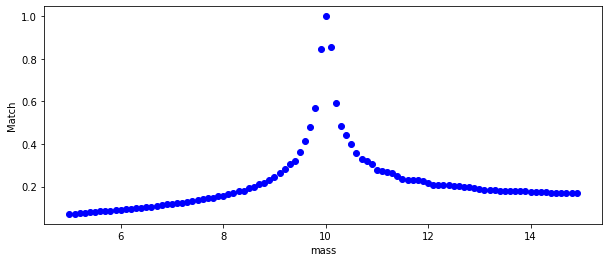

In [14]:
from pycbc.waveform import get_td_waveform
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower

f_low = 30
sample_rate = 4096
snrs = {}
Snr_list = []

# Generate the two waveforms to compare
hp, hc = get_td_waveform(approximant="TaylorT4",
                         mass1=10,
                         mass2=10,
                         f_lower=f_low,
                         delta_t=1.0/sample_rate)


mass1 = numpy.arange(5, 15, 0.10) #mass range bewteen 5 to 15 Solar mass
mass2 = mass1

for i in range(len(mass1)):

    m = mass1[i] # Solar masses
    sp, sc = get_td_waveform(approximant="TaylorT4",
                     mass1=m,
                     mass2=m,
                     f_lower=f_low,
                     delta_t=1.0/sample_rate)
        
    # Resize the waveforms to the same length
    tlen = max(len(sp), len(hp))
    sp.resize(tlen)
    hp.resize(tlen)
    # Generate the aLIGO ZDHP PSD
    delta_f = 1.0 / sp.duration
    flen = tlen//2 + 1
    psd = aLIGOZeroDetHighPower(flen, delta_f, f_low)

    m, i = match(hp, sp, psd=psd, low_frequency_cutoff=f_low)
    # modify the match data so we can use it in the graph

    Snr_list.append(m)


snrs[i] = Snr_list


pylab.figure(figsize=[10, 4])
pylab.plot(mass1, snrs[i], 'bo')
pylab.ylabel('Match')
pylab.xlabel('mass')
pylab.show()

# QUESTION 2

***part 1***

Loading the data for problem 2.

In [15]:
import numpy as np
import pycbc.types 

d = np.load('noise_ts_4096Hz.npy')
dt = d[:, 0]
d = pycbc.types.TimeSeries(d[:, 1], delta_t = dt[1]- dt[0])
data = d

Calculating the matched filter for this data using template waveforms with mass ranges between 5 to 10. 

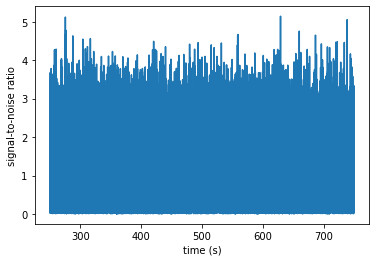

Maximum SNR 5.14255771068566


In [16]:
#Now calculate power spectral density from the data

#------------------------------------------------
from pycbc.psd import welch, interpolate
psds = interpolate(welch(d), 1.0 / d.duration)

#---------------------------------------------------
#Matched Filtering
#---------------------------------------------------
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import pylab
flow = 30 #Hz
stilde = data.to_frequencyseries()


hp, hc = pycbc.waveform.get_fd_waveform(approximant="TaylorF2",
                             mass1=10, mass2=10,
                             f_lower=flow, delta_f=stilde.delta_f)

hp.resize(len(stilde))  
snr = pycbc.filter.matched_filter(hp, stilde, psd=psds,
                                      low_frequency_cutoff=flow)


# Remove regions corrupted by filter wraparound
snr = snr[len(snr) // 4: len(snr) * 3 // 4]

pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('signal-to-noise ratio')
pylab.xlabel('time (s)')
pylab.show()
print ( 'Maximum SNR', max(abs(snr)) )

#-----------------------------------
#now you can take the max(abs(snr)) as your maximum snr. 


The SNR does not cross 8, so there is no signal.

***part 2***

Whitening the data by dividing the noise by spectral density. 

Text(0, 0.5, 'Probability')

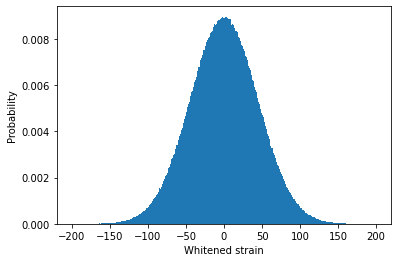

In [17]:
import pycbc.psd
white_data = (data.to_frequencyseries() / psds**0.5).to_timeseries()
white_data.crop(4, 4)

pylab.hist(white_data, bins=400, range=(-200,200), density=True)
pylab.xlabel('Whitened strain')
pylab.ylabel('Probability')

***part 3***

Testing if the noise is following the sationary assumption. The assumption (whitening) is not necessarily true for real detectors. We just assume that the further away from the center (the signal) we are, the more probably it is noise. Making an estimation.

Text(0, 0.5, 'histogram')

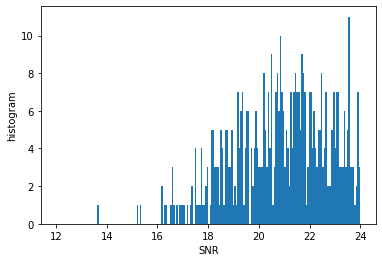

In [18]:
from pycbc.filter import sigmasq
from pycbc.waveform import get_fd_waveform

hp, hc = get_fd_waveform(approximant="TaylorF2",
                         mass1=3,
                         mass2=3,
                         delta_f=1.0,
                         distance=500,
                         f_lower=20.0, f_final = 2048.0)


sampleSize = int(len(data) / 1000)
snrs = []

for i in range(0, 1000):

   dataChunck = data[i*sampleSize:(i+1)*sampleSize]

   #calculate psd for each data chunck
   psds = interpolate(welch(dataChunck), dataChunck.duration)

   #use the psd as a variable in the snr and put the snrs in a list
   SNR = (pycbc.filter.sigmasq(hp, psds))**0.5
   snrs.append(SNR)


#plot histogram
pylab.hist(snrs, bins=200, range=(12, 24))
pylab.xlabel('SNR')
pylab.ylabel('histogram')


The distribution for the data is not normal but leans towards the right hand side of the histogram. So, in reality, the signal doesn't lay equal distance from all the noise aroud it.

# Question 3

***part 1***

A horizon distance for advanced LIGO detector is plotted. The modeled power spectral density is considered first.

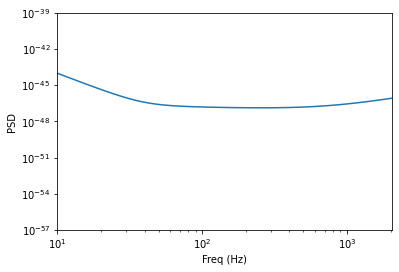

In [19]:
import pycbc.psd
import numpy as np

flow=4.0 # set up the lower cut off frequency
delta_f=1.0/16
flen = int(2048.0/(delta_f)) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

psd.data[:int(flow/delta_f)] = np.inf # set the value outside the frequency range to infinity
psd.data[-1] = np.inf

pylab.loglog(psd.sample_frequencies, psd)
pylab.xlim(10, 2048)
pylab.ylim(1e-57, 1e-39)
pylab.xlabel('Freq (Hz)')
pylab.ylabel('PSD')
pylab.show()

A J shaped PSD curve is obtained. Finding the horizon plot.

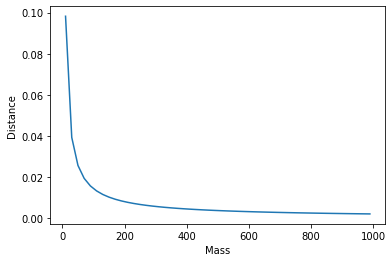

In [21]:
from pycbc.filter import sigmasq
from pycbc.waveform import get_fd_waveform

mass1 = numpy.arange(5, 500, 10)
mass2 = mass1
psds = []
snrs = []
dist_list = []
dist_d = {}

for i in range(len(mass1)):
   ma = mass1[i]
   hp, hc = get_fd_waveform(approximant="TaylorF2",
                            mass1=ma,
                            mass2=ma,
                            delta_f=delta_f,
                            distance=1000,
                            f_lower=20.0, f_final = 2048.0)

   hp.resize(len(psd))
   #use the psd as a variable in the snr and put the snrs in a list
   SNR = (pycbc.filter.sigmasq(hp, psd))**0.5
   snrs.append(SNR)
   dist = 1 / SNR
   dist_list.append(dist)
  
dist_d[i] = dist_list

pylab.plot(mass1+mass2, dist_d[i])
pylab.xlabel('Mass')
pylab.ylabel('Distance')
pylab.show()
   

***part 2***

Horizon distance is decreasing over mass. Telescopes have a definite range distance they can observe. For every distance, there is an optimal range of masses the interferometer can measure. The signal decreases the more different the mass is from the optimal because the reading ability of the meter is limited.  

***part 3***

Repeating the analysis for Einstein Telescope.

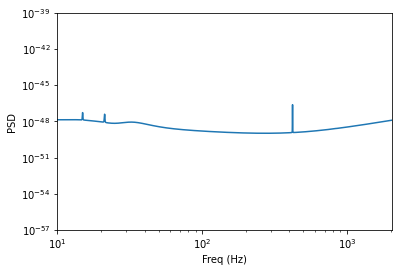

In [22]:
import pycbc.psd
import numpy as np

flow = 4.0 # lower cut off frequency
delta_f = 1.0/16
flen = int(2048.0/delta_f) + 1
psd = pycbc.psd.EinsteinTelescopeP1600143(flen, delta_f, flow)

psd.data[:int(flow/delta_f)] = np.inf # value outside the frequency range infinity
psd.data[-1] = np.inf

pylab.loglog(psd.sample_frequencies, psd)
pylab.xlim(10, 2048)
pylab.ylim(1e-57, 1e-39)
pylab.xlabel('Freq (Hz)')
pylab.ylabel('PSD')
pylab.show()

Finding the horizon distance graph for ET. It appears to be similar to the one of aLIGO.

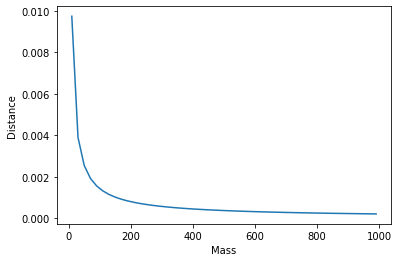

In [23]:
from pycbc.filter import sigmasq
from pycbc.waveform import get_fd_waveform

mass1 = numpy.arange(5, 500, 10)
mass2 = mass1
psds = []
snrs = []
dist_list = []
dist_d = {}

for i in range(len(mass1)):
   ma = mass1[i]
   hp, hc = get_fd_waveform(approximant="TaylorF2",
                            mass1=ma,
                            mass2=ma,
                            delta_f=delta_f,
                            distance=1000,
                            f_lower=20.0, f_final = 2048.0)

   hp.resize(len(psd))
   #use the psd as a variable in the snr and put the snrs in a list
   SNR = (pycbc.filter.sigmasq(hp, psd))**0.5
   snrs.append(SNR)
   dist = 1 / SNR
   dist_list.append(dist)
  
dist_d[i] = dist_list

pylab.plot(mass1+mass2, dist_d[i])
pylab.xlabel('Mass')
pylab.ylabel('Distance')
pylab.show()